<a href="https://colab.research.google.com/github/harshithanadighv/controlled-irrigation-using-AIoT/blob/main/internproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving emails.csv to emails (3).csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimized Eco-Friendly Model Accuracy: 0.7768115942028986
              precision    recall  f1-score   support

           0       0.76      1.00      0.86       739
           1       0.99      0.22      0.36       296

    accuracy                           0.78      1035
   macro avg       0.87      0.61      0.61      1035
weighted avg       0.83      0.78      0.72      1035



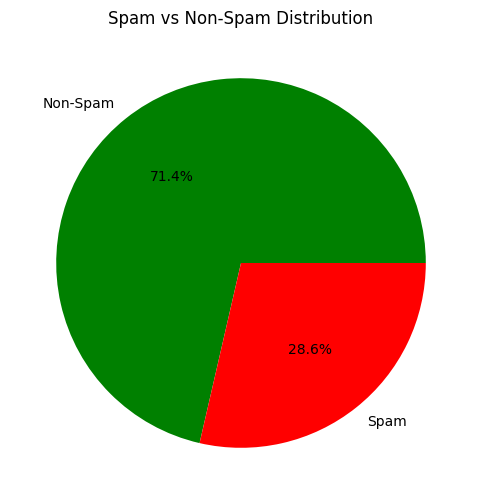

<ipython-input-2-7df1ad675610>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Non-Spam', 'Spam'], y=y_test_counts, palette=['green', 'red'])


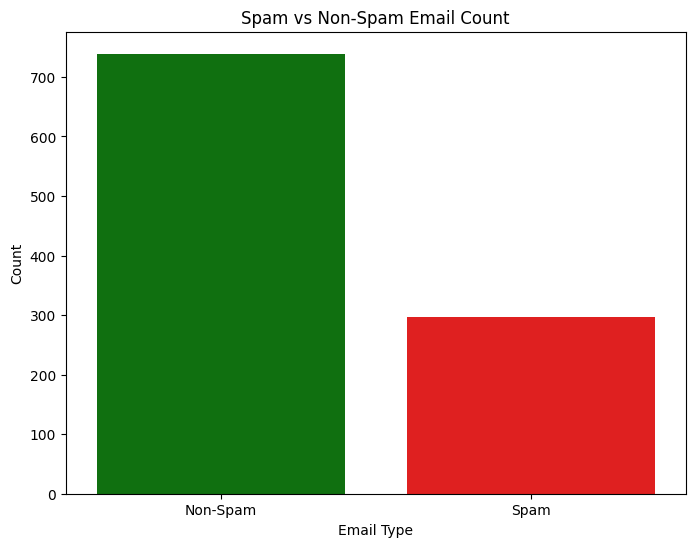

To automate spam deletion, integrate Gmail API using Google Apps Script or Python's Gmail API.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
from google.colab import files
import os

# Install missing dependencies
!pip install onnx skl2onnx

import onnx
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Upload dataset manually in Colab
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Drop unnecessary column
df.drop(columns=['Email No.'], inplace=True)

# Feature selection to reduce computation
feature_selector = ExtraTreesClassifier(n_estimators=10)  # Reduce estimators to lower power consumption
feature_selector.fit(df.drop(columns=['Prediction']), df['Prediction'])
important_features = df.drop(columns=['Prediction']).columns[feature_selector.feature_importances_ > 0.005]
X = df[important_features]
y = df['Prediction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a lightweight model with optimized parameters
model = ExtraTreesClassifier(n_estimators=20, max_depth=6, random_state=42)  # Reduce estimators and depth further
model.fit(X_train, y_train)

# Convert model to ONNX format (optimized for lightweight deployment)
initial_type = [('float_input', FloatTensorType([None, X_train.shape[1]]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)
with open("eco_friendly_spam_classifier.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())
files.download("eco_friendly_spam_classifier.onnx")

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Eco-Friendly Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Generate a pie chart for spam vs. non-spam emails
plt.figure(figsize=(6, 6))
y_test_counts = y_test.value_counts()
plt.pie(y_test_counts, labels=['Non-Spam', 'Spam'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("Spam vs Non-Spam Distribution")
plt.show()

# Generate a bar chart for classification results
plt.figure(figsize=(8, 6))
sns.barplot(x=['Non-Spam', 'Spam'], y=y_test_counts, palette=['green', 'red'])
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.title("Spam vs Non-Spam Email Count")
plt.show()

# Notify user about potential Gmail API integration
print("To automate spam deletion, integrate Gmail API using Google Apps Script or Python's Gmail API.")
